In [3]:
import pandas as pd
import seaborn as sns

In [4]:
avocado = pd.read_csv(r"C:\Users\iyann\Downloads\avocado.csv")
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:

avocado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [18]:
avocado.Date = pd.to_datetime(avocado.Date)
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [60]:
avocado_melted = pd.melt(avocado, id_vars=['Date'], value_vars=['Total Bags', 'Small Bags'],
                         var_name='Bags', value_name='Count')
print(avocado_melted)

            Date        Bags     Count
0     2015-12-27  Total Bags   8696.87
1     2015-12-20  Total Bags   9505.56
2     2015-12-13  Total Bags   8145.35
3     2015-12-06  Total Bags   5811.16
4     2015-11-29  Total Bags   6183.95
...          ...         ...       ...
36493 2018-02-04  Small Bags  13066.82
36494 2018-01-28  Small Bags   8940.04
36495 2018-01-21  Small Bags   9351.80
36496 2018-01-14  Small Bags  10919.54
36497 2018-01-07  Small Bags  11988.14

[36498 rows x 3 columns]


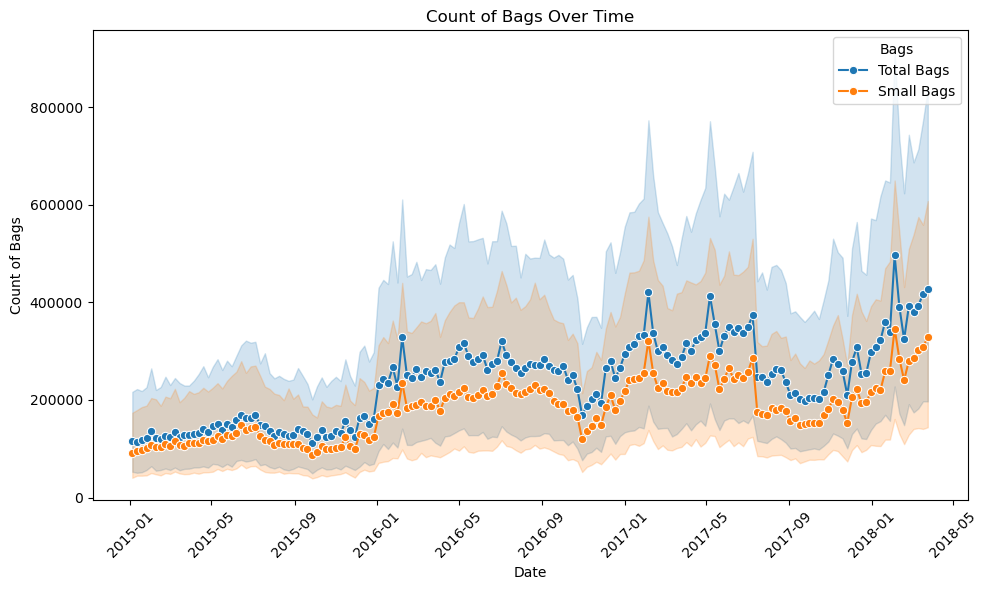

In [34]:
import matplotlib.pyplot as plt
avocado_melted['Date'] = pd.to_datetime(avocado_melted['Date'])
plt.figure(figsize=(10,6))
sns.lineplot(data=avocado_melted, x='Date', y='Count', hue='Bags', marker='o')
plt.title('Count of Bags Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Bags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
quantile_lables = ['Poor', 'Modest', 'Good', 'Excellent']
avocado['Sales Volume'] = pd.qcut(avocado['Total Volume'], q= 4, labels=quantile_lables)
print(avocado[['Date', 'Total Volume', 'Sales Volume']].head())

        Date  Total Volume Sales Volume
0 2015-12-27      64236.62       Modest
1 2015-12-20      54876.98       Modest
2 2015-12-13     118220.22         Good
3 2015-12-06      78992.15       Modest
4 2015-11-29      51039.60       Modest


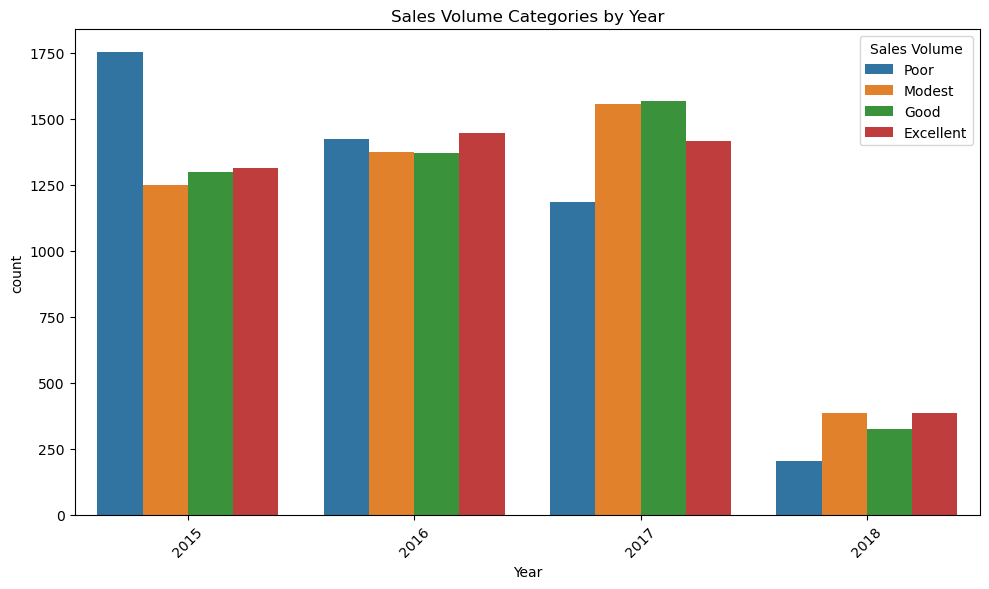

In [35]:
avocado['Year'] = pd.to_datetime(avocado['Date']).dt.year
plt.figure(figsize=(10,6))
sns.countplot(x='Year', hue='Sales Volume', data=avocado)
plt.title("Sales Volume Categories by Year")
plt.xlabel("Year")
plt.ylabel("count")
plt.legend(title="Sales Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
melted_avocado = pd.melt(avocado,id_vars=['year'],value_vars=['Small Bags', 'Large Bags', "XLarge Bags"],var_name='Bags',value_name='Count')
print(melted_avocado)

       year         Bags    Count
0      2015   Small Bags  8603.62
1      2015   Small Bags  9408.07
2      2015   Small Bags  8042.21
3      2015   Small Bags  5677.40
4      2015   Small Bags  5986.26
...     ...          ...      ...
54742  2018  XLarge Bags     0.00
54743  2018  XLarge Bags     0.00
54744  2018  XLarge Bags     0.00
54745  2018  XLarge Bags     0.00
54746  2018  XLarge Bags     0.00

[54747 rows x 3 columns]


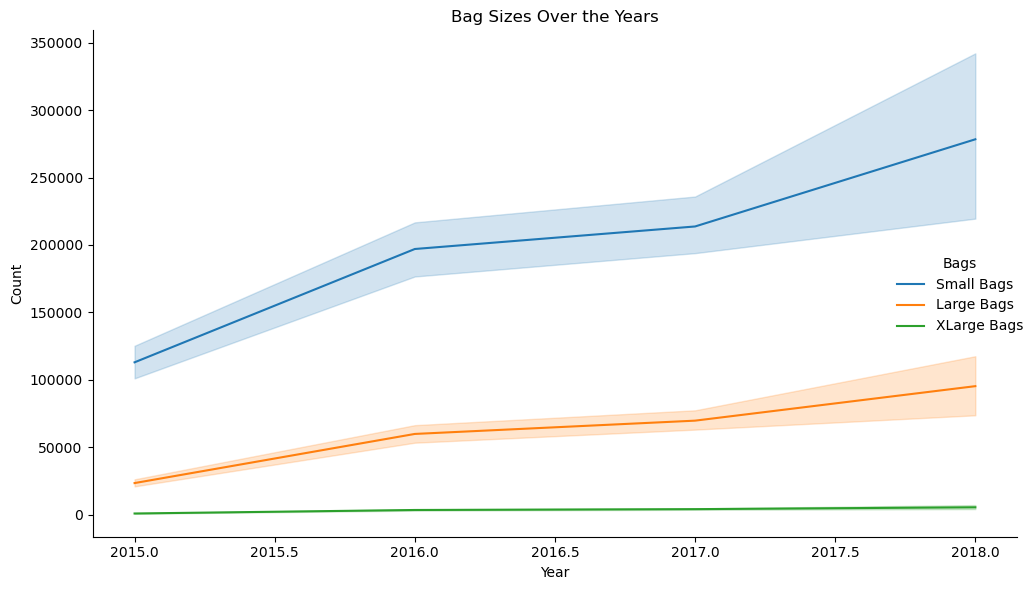

In [70]:
sns.relplot(kind='line',x='year',y='Count',hue='Bags',data=melted_avocado,height=6,aspect=1.5)
plt.title("Bag Sizes Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()

## Small Bags sell the best